In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

df = pd.read_csv("Disponibilidad Acuíferos_2023 - Valle de México.csv")

In [ ]:
df.head()

,clvacuifero,acuifero,clvrha,rha,r,dnc,vcas,vextet,veas,dmapositiva,dmanegativa,situacion,anio,condicion
0,901,Zona Metropolitana de la Cd. de México,XIII,Aguas del Valle de México,512.8,0.0,979.762196,0,993.229914,0.000000,-480.429914,Sin Disponibilidad,2023,SOBREEXPLOTADO
1,1308,El Astillero,XIII,Aguas del Valle de México,3.1,0.0,0.038982,0,0.724197,2.375803,0.000000,Con Disponibilidad,2023,SUBEXPLOTADO
2,1309,Chapantongo-Alfajayucan,XIII,Aguas del Valle de México,136.9,112.9,5.443209,0,10.346407,13.653593,0.000000,Con Disponibilidad,2023,SUBEXPLOTADO
3,1310,Valle del Mezquital,XIII,Aguas del Valle de México,515.0,293.0,167.952024,0,191.537257,30.462743,0.000000,Con Disponibilidad,2023,SUBEXPLOTADO
4,1311,Ajacuba,XIII,Aguas del Valle de México,25.7,15.6,2.459013,0,5.187226,4.912774,0.000000,Con Disponibilidad,2023,SUBEXPLOTADO


In [ ]:
df.isnull()

,clvacuifero,acuifero,clvrha,rha,r,dnc,vcas,vextet,veas,dmapositiva,dmanegativa,situacion,anio,condicion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Creating column without accents for aquifer names
df['aquifer'] = df['acuifero'].str.replace('á', 'a').str.replace('é', 'e') \
                              .str.replace('í', 'i').str.replace('ó', 'o') \
                              .str.replace('ú', 'u').str.replace('ñ', 'n') \
                              .str.replace('Á', 'A').str.replace('É', 'E') \
                              .str.replace('Í', 'I').str.replace('Ó', 'O') \
                              .str.replace('Ú', 'U').str.replace('Ñ', 'N')

# Translating values ​​from the "condicion" column
df['condition'] = df['condicion'].map({
    'SOBREEXPLOTADO': 'Overexploited',
    'SUBEXPLOTADO': 'Subexploited'
})

# Translating values ​​from the "situacion" column
df['situation'] = df['situacion'].map({
    'Con Disponibilidad': 'With Availability',
    'Sin Disponibilidad': 'Without Availability'
})


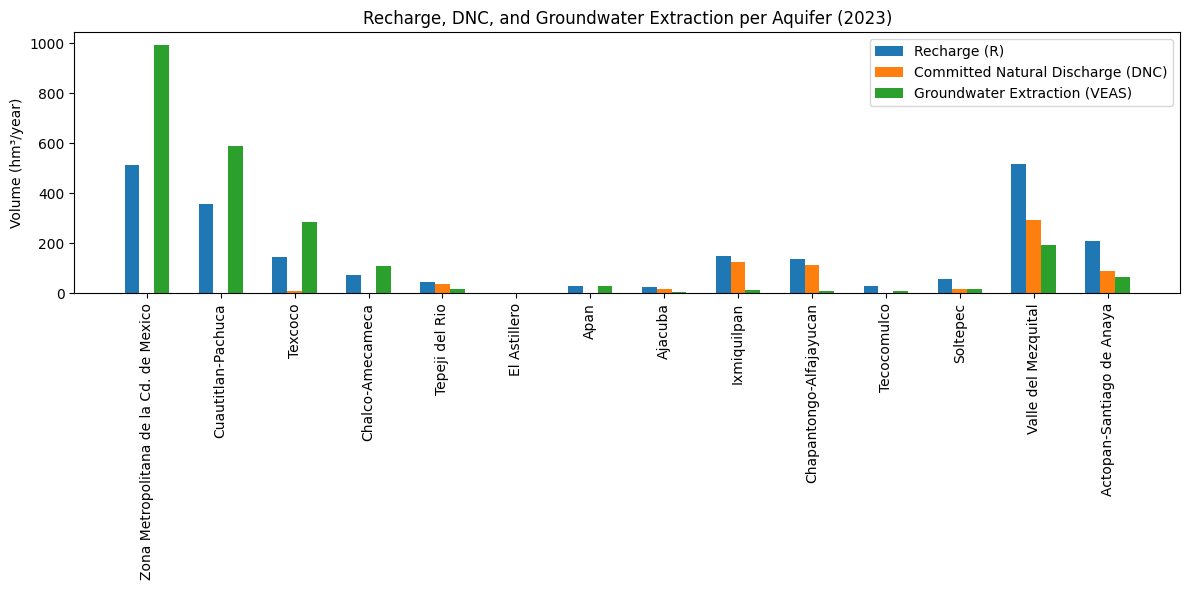

,aquifer,r,dnc,veas,dma_calculated,dmapositiva,dmanegativa
0,Zona Metropolitana de la Cd. de Mexico,512.8,0.0,993.229914,-480.429914,0.000000,-480.429914
12,Cuautitlan-Pachuca,356.7,0.0,586.642637,-229.942637,0.000000,-229.942637
11,Texcoco,145.1,10.4,284.505124,-149.805124,0.000000,-149.805124
10,Chalco-Amecameca,74.0,0.0,109.993539,-35.993539,0.000000,-35.993539
7,Tepeji del Rio,46.3,35.2,15.354466,-4.254466,0.000000,-4.254466
1,El Astillero,3.1,0.0,0.724197,2.375803,2.375803,0.000000
9,Apan,30.3,0.0,27.543609,2.756391,2.756391,0.000000
4,Ajacuba,25.7,15.6,5.187226,4.912774,4.912774,0.000000
5,Ixmiquilpan,150.1,124.6,12.790550,12.709450,12.709450,0.000000
2,Chapantongo-Alfajayucan,136.9,112.9,10.346407,13.653593,13.653593,0.000000


In [ ]:
# Calculating average annual availability (DMA)
df['dma_calculated'] = df['r'] - df['dnc'] - df['veas']

# Sorting to graph
df_sorted = df.sort_values(by='dma_calculated')

# Bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = range(len(df_sorted))

plt.bar(x, df_sorted['r'], width=bar_width, label='Recharge (R)')
plt.bar([p + bar_width for p in x], df_sorted['dnc'], width=bar_width, label='Committed Natural Discharge (DNC)')
plt.bar([p + bar_width*2 for p in x], df_sorted['veas'], width=bar_width, label='Groundwater Extraction (VEAS)')

plt.xticks([p + bar_width for p in x], df_sorted['aquifer'], rotation=90)
plt.ylabel('Volume (hm³/year)')
plt.title('Recharge, DNC, and Groundwater Extraction per Aquifer (2023)')
plt.legend()
plt.tight_layout()
plt.show()

# Showing results table
df_sorted[['aquifer', 'r', 'dnc', 'veas', 'dma_calculated', 'dmapositiva', 'dmanegativa']]


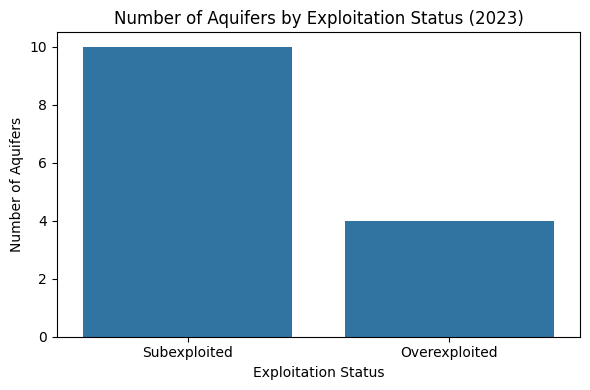

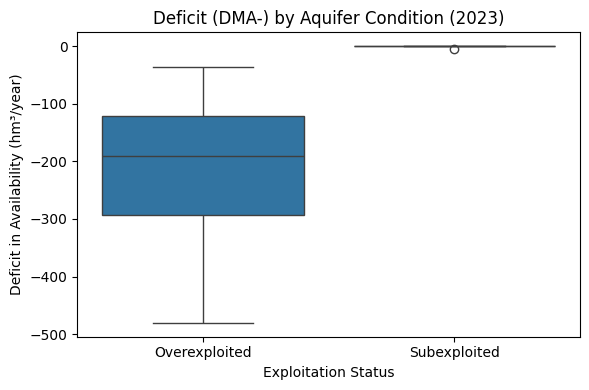

,condition,dma_calculated,dmanegativa
0,Overexploited,-224.042804,-224.042803
1,Subexploited,15.663151,-0.425447


In [ ]:
# Calculating average annual availability
df['dma_calculated'] = df['r'] - df['dnc'] - df['veas']

# Number of aquifers by condition
condition_counts = df['condition'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Number of Aquifers']

# Tally chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Condition', y='Number of Aquifers', data=condition_counts)
plt.title('Number of Aquifers by Exploitation Status (2023)')
plt.ylabel('Number of Aquifers')
plt.xlabel('Exploitation Status')
plt.tight_layout()
plt.show()

# Box plot to see distribution of the deficit (DMA-)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='condition', y='dmanegativa')
plt.title('Deficit (DMA-) by Aquifer Condition (2023)')
plt.ylabel('Deficit in Availability (hm³/year)')
plt.xlabel('Exploitation Status')
plt.tight_layout()
plt.show()

# Average deficits by condition
df.groupby('condition')[['dma_calculated', 'dmanegativa']].mean().reset_index()


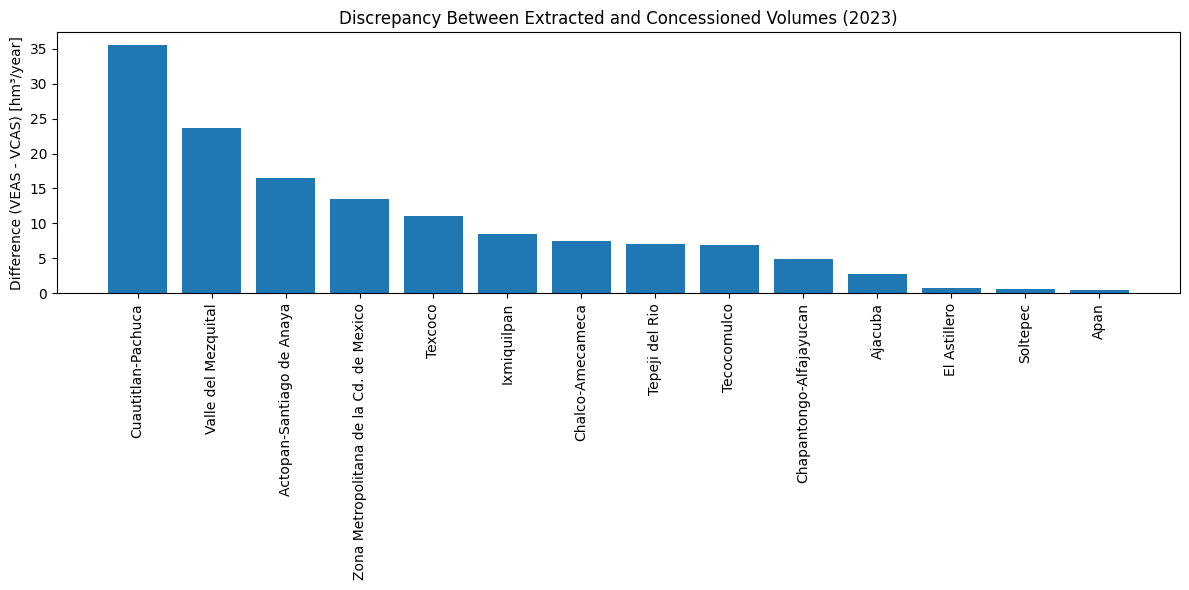

,aquifer,veas,vcas,extraction_vs_concession
12,Cuautitlan-Pachuca,586.642637,551.075936,35.566701
3,Valle del Mezquital,191.537257,167.952024,23.585233
6,Actopan-Santiago de Anaya,64.955907,48.492584,16.463323
0,Zona Metropolitana de la Cd. de Mexico,993.229914,979.762196,13.467718
11,Texcoco,284.505124,273.404707,11.100417
5,Ixmiquilpan,12.790550,4.270279,8.520271
10,Chalco-Amecameca,109.993539,102.570449,7.423090
7,Tepeji del Rio,15.354466,8.335828,7.018638
8,Tecocomulco,9.955644,3.109183,6.846461
2,Chapantongo-Alfajayucan,10.346407,5.443209,4.903198


In [ ]:
# Calculating the difference between the extracted and granted volume
df['extraction_vs_concession'] = df['veas'] - df['vcas']

# Sorting by difference
df_sorted = df.sort_values(by='extraction_vs_concession', ascending=False)

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['aquifer'], df_sorted['extraction_vs_concession'])
plt.xticks(rotation=90)
plt.ylabel('Difference (VEAS - VCAS) [hm³/year]')
plt.title('Discrepancy Between Extracted and Concessioned Volumes (2023)')
plt.tight_layout()
plt.show()

# Showing table with discrepancies
df_sorted[['aquifer', 'veas', 'vcas', 'extraction_vs_concession']]


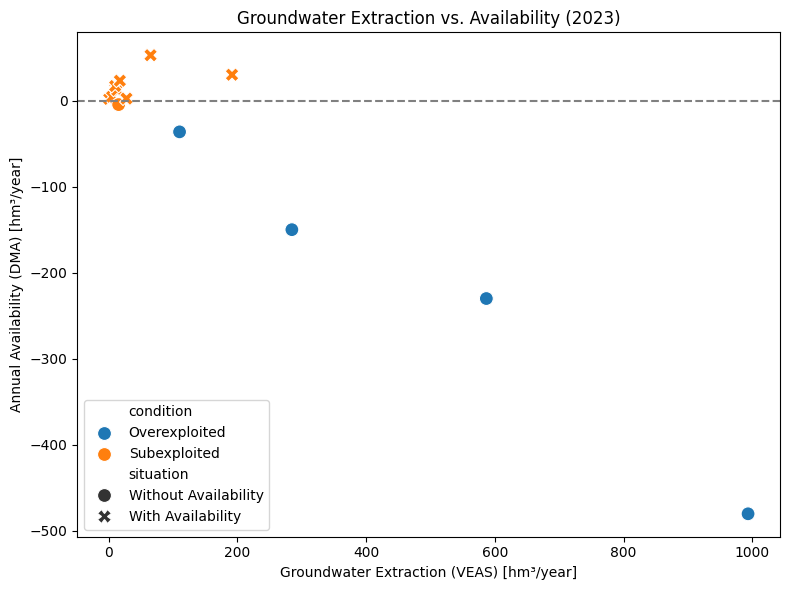

,aquifer,veas,dma_calculated,condition,situation
0,Zona Metropolitana de la Cd. de Mexico,993.229914,-480.429914,Overexploited,Without Availability
12,Cuautitlan-Pachuca,586.642637,-229.942637,Overexploited,Without Availability
11,Texcoco,284.505124,-149.805124,Overexploited,Without Availability
10,Chalco-Amecameca,109.993539,-35.993539,Overexploited,Without Availability
7,Tepeji del Rio,15.354466,-4.254466,Subexploited,Without Availability
1,El Astillero,0.724197,2.375803,Subexploited,With Availability
9,Apan,27.543609,2.756391,Subexploited,With Availability
4,Ajacuba,5.187226,4.912774,Subexploited,With Availability
5,Ixmiquilpan,12.790550,12.709450,Subexploited,With Availability
2,Chapantongo-Alfajayucan,10.346407,13.653593,Subexploited,With Availability


In [ ]:
# Calculating DMA
df['dma_calculated'] = df['r'] - df['dnc'] - df['veas']

# Scatter plot: VEAS vs DMA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='veas', y='dma_calculated', hue='condition', style='situation', s=100)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Groundwater Extraction vs. Availability (2023)')
plt.xlabel('Groundwater Extraction (VEAS) [hm³/year]')
plt.ylabel('Annual Availability (DMA) [hm³/year]')
plt.tight_layout()
plt.show()

# Table to compare status and overexploitation
df[['aquifer', 'veas', 'dma_calculated', 'condition', 'situation']].sort_values(by='dma_calculated')


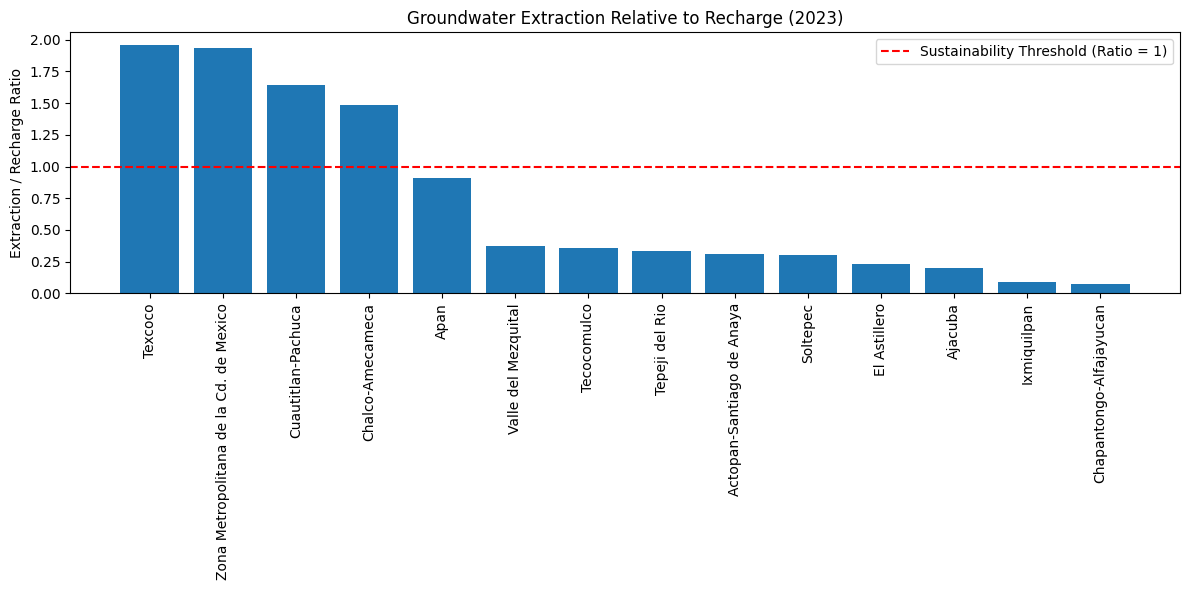

,aquifer,veas,r,veas_vs_r_ratio,condition,situation
11,Texcoco,284.505124,145.1,1.960752,Overexploited,Without Availability
0,Zona Metropolitana de la Cd. de Mexico,993.229914,512.8,1.936876,Overexploited,Without Availability
12,Cuautitlan-Pachuca,586.642637,356.7,1.644639,Overexploited,Without Availability
10,Chalco-Amecameca,109.993539,74.0,1.486399,Overexploited,Without Availability
9,Apan,27.543609,30.3,0.909030,Subexploited,With Availability
3,Valle del Mezquital,191.537257,515.0,0.371917,Subexploited,With Availability
8,Tecocomulco,9.955644,27.8,0.358117,Subexploited,With Availability
7,Tepeji del Rio,15.354466,46.3,0.331630,Subexploited,Without Availability
6,Actopan-Santiago de Anaya,64.955907,208.1,0.312138,Subexploited,With Availability
13,Soltepec,17.273231,57.0,0.303039,Subexploited,With Availability


In [ ]:
# Calculating the VEAS / R ratio
df['veas_vs_r_ratio'] = df['veas'] / df['r']

# Sorting for display
df_sorted = df.sort_values(by='veas_vs_r_ratio', ascending=False)

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['aquifer'], df_sorted['veas_vs_r_ratio'])
plt.xticks(rotation=90)
plt.ylabel('Extraction / Recharge Ratio')
plt.title('Groundwater Extraction Relative to Recharge (2023)')
plt.axhline(1, color='red', linestyle='--', label='Sustainability Threshold (Ratio = 1)')
plt.legend()
plt.tight_layout()
plt.show()

# Summary table
df_sorted[['aquifer', 'veas', 'r', 'veas_vs_r_ratio', 'condition', 'situation']]


           Group    Mean DMA  Standard Deviation
0   Subexploited   15.663151           16.854590
1  Overexploited -224.042804          188.540816

T-statistic: 2.538694338492579
P-value: 0.08424516356376013


<ipython-input-21-7d5573c47312>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='dma_calculated', palette='Set2')


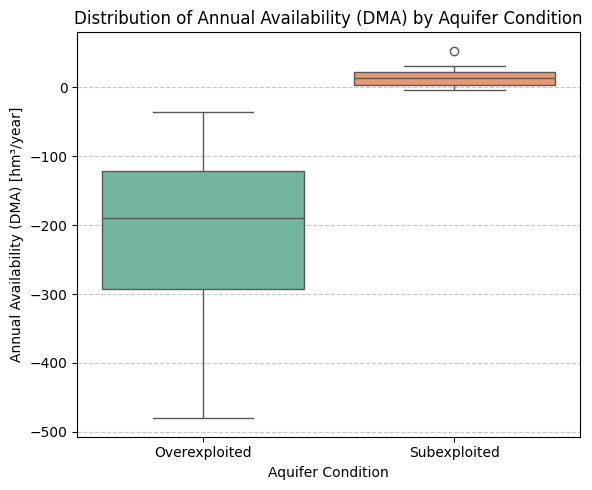

In [ ]:
from scipy.stats import ttest_ind

# Calculating DMA
df['dma_calculated'] = df['r'] - df['dnc'] - df['veas']

# Separating into two groups
subexploited = df[df['condicion'] == 'SUBEXPLOTADO']['dma_calculated']
overexploited = df[df['condicion'] == 'SOBREEXPLOTADO']['dma_calculated']

# T-test for difference of means
t_stat, p_val = ttest_ind(subexploited, overexploited, equal_var=False)

# Summary results
summary = pd.DataFrame({
    'Group': ['Subexploited','Overexploited'],
    'Mean DMA': [subexploited.mean(), overexploited.mean()],
    'Standard Deviation': [subexploited.std(), overexploited.std()]
})

print(summary)
print("\nT-statistic:", t_stat)
print("P-value:", p_val)

# Creating the boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='condition', y='dma_calculated', palette='Set2')

# Adding titles and tags
plt.title('Distribution of Annual Availability (DMA) by Aquifer Condition')
plt.ylabel('Annual Availability (DMA) [hm³/year]')
plt.xlabel('Aquifer Condition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
